#Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('https://github.com/Adkurrr/EDA-and-Prediction-Model-using-Retail-Transaction-Dataset/blob/main/Dataset%20Tugas.csv?raw=true', sep=None)
df.head()

<ipython-input-2-9e88beb652ff>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('https://github.com/Adkurrr/EDA-and-Prediction-Model-using-Retail-Transaction-Dataset/blob/main/Dataset%20Tugas.csv?raw=true', sep=None)


IDKonsumen IDProduk  Kuantitas       Harga      TglTransaksi Pembayaran  \
0      109318        C          7  8007984415  12/26/2023 12:32       Cash   
1      993229        C          4  7519522942     8/5/2023 0:00       Cash   
2      579675        A          8  3152881648   3/11/2024 18:51       Cash   
3      799826        D          5  9888021828  10/27/2023 22:00     PayPal   
4      121413        A          7  9318851246  12/22/2023 11:38       Cash   

                                          LokasiToko KategoriProduk  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354          Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483     Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...          Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...          Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142    Electronics   

       Diskon  JumlahTotal  
0   186770995   4558627638  
1  1412136502   2583065464  
2  1594370066   2120156509  
3   668633678   4613437694  
4  4030095691   6260304837

#Pembersihan Data

###Cek Missing Value

In [ ]:
df.isnull().sum()

IDKonsumen        0
IDProduk          0
Kuantitas         0
Harga             0
TglTransaksi      0
Pembayaran        0
LokasiToko        0
KategoriProduk    0
Diskon            0
JumlahTotal       0
dtype: int64

###Cek duplikat data

In [ ]:
df.duplicated().sum()

0

#Exploratory Data Analisis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   IDKonsumen      100000 non-null  int64 
 1   IDProduk        100000 non-null  object
 2   Kuantitas       100000 non-null  int64 
 3   Harga           100000 non-null  int64 
 4   TglTransaksi    100000 non-null  object
 5   Pembayaran      100000 non-null  object
 6   LokasiToko      100000 non-null  object
 7   KategoriProduk  100000 non-null  object
 8   Diskon          100000 non-null  int64 
 9   JumlahTotal     100000 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 7.6+ MB


In [ ]:
#analisis deskriptif
df.describe()

IDKonsumen      Kuantitas         Harga        Diskon   JumlahTotal
count  100000.000000  100000.000000  1.000000e+05  1.000000e+05  1.000000e+05
mean   500463.982180       5.009290  4.999678e+09  2.948688e+09  3.532441e+09
std    288460.917524       2.579808  2.887417e+09  2.707119e+09  2.398386e+09
min        14.000000       1.000000  5.323500e+04  0.000000e+00  1.085850e+05
25%    250693.750000       3.000000  2.497585e+09  1.214280e+09  1.624090e+09
50%    499679.000000       5.000000  5.001886e+09  1.716311e+09  3.007898e+09
75%    751104.750000       7.000000  7.498141e+09  4.425406e+09  5.089379e+09
max    999997.000000       9.000000  9.999928e+09  9.999781e+09  9.998947e+09

In [ ]:
#drop kolom yang tidak digunakan dalam exploratory data analisis
df.drop(['IDKonsumen','IDProduk','TglTransaksi','LokasiToko','Pembayaran'],axis=1,inplace=True)

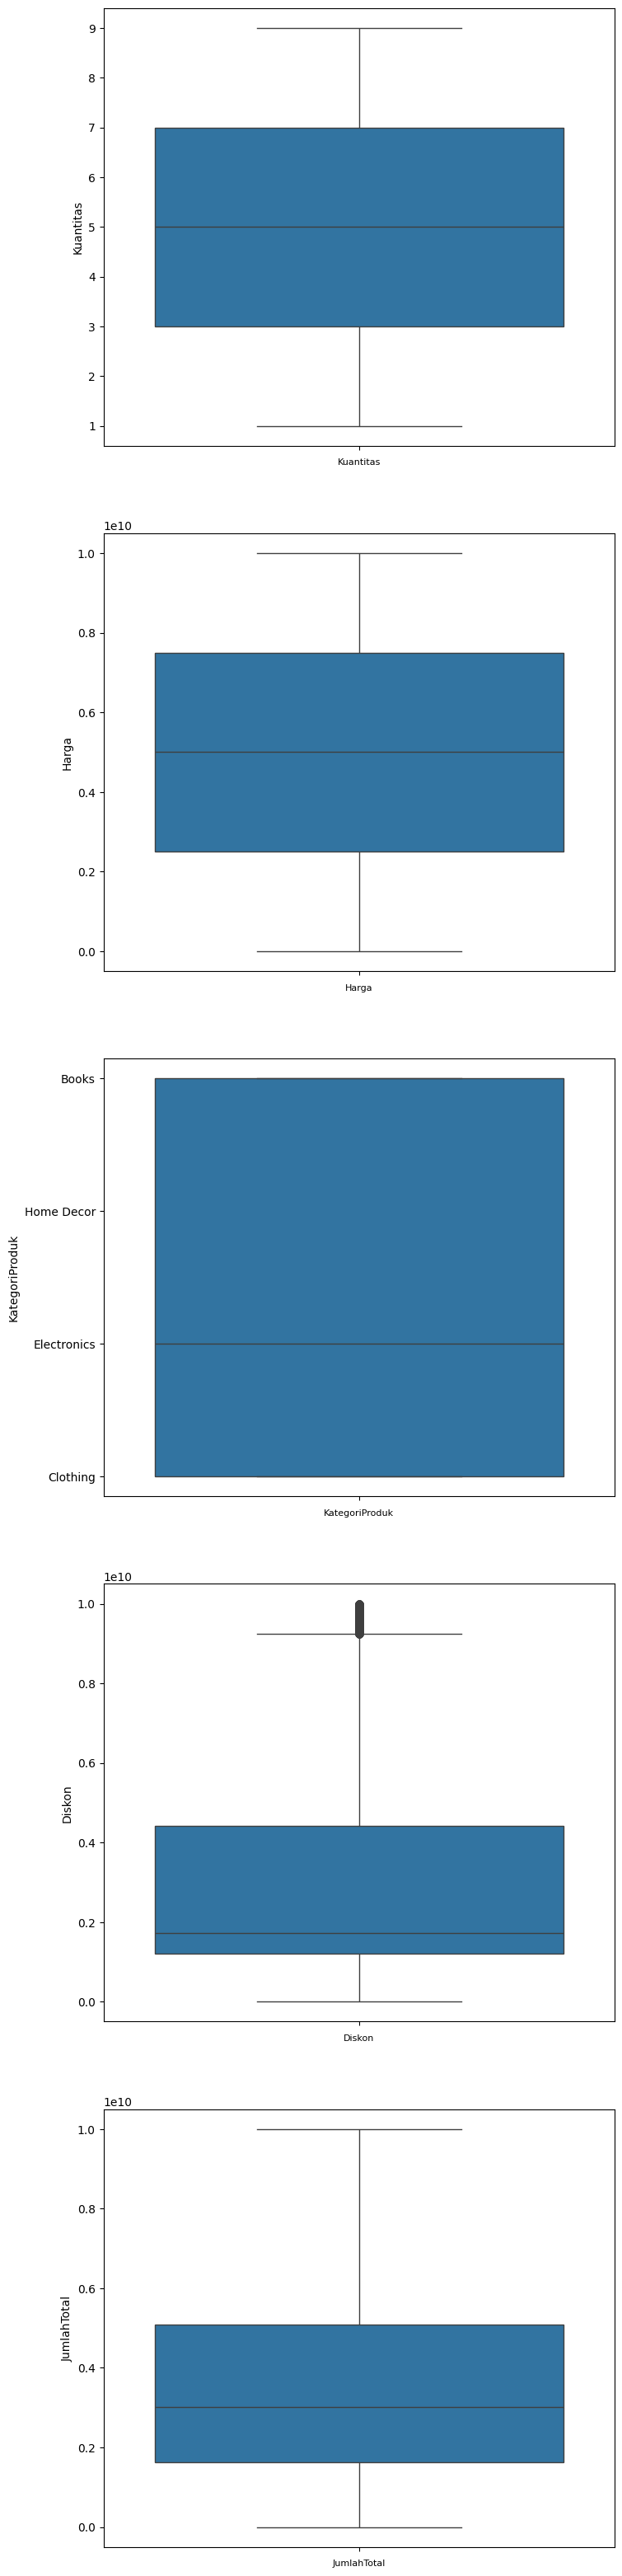

In [ ]:
#visualisasi dengan boxplot
ig, ax = plt.subplots(len(list(df.columns)), figsize=(8,40))

for i, feature_name in enumerate(list(df.columns)):
  sns.boxplot(y=df[feature_name], ax=ax[i])
  ax[i].set_xlabel(feature_name, fontsize=8)

plt.show()

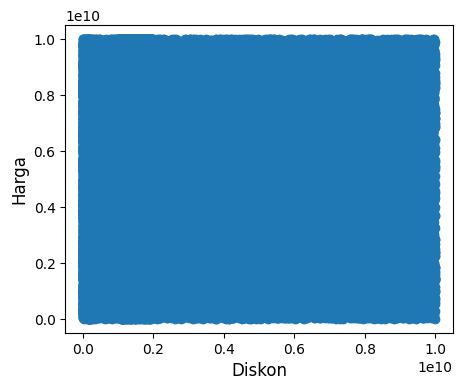

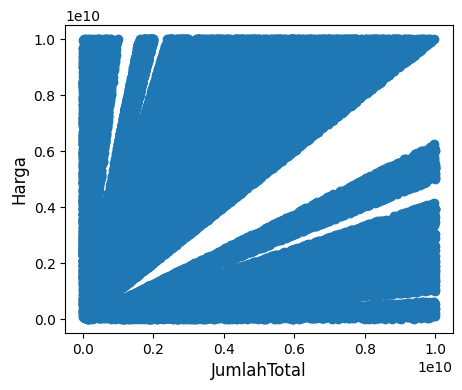

In [ ]:
#visualisasi dengan scatter plot
for feature_name in df.columns:
  plt.figure(figsize=(5,4))
  plt.scatter(df[feature_name], df['Harga'])
  plt.ylabel('Harga', size=12)
  plt.xlabel(feature_name, size=12)

plt.show()

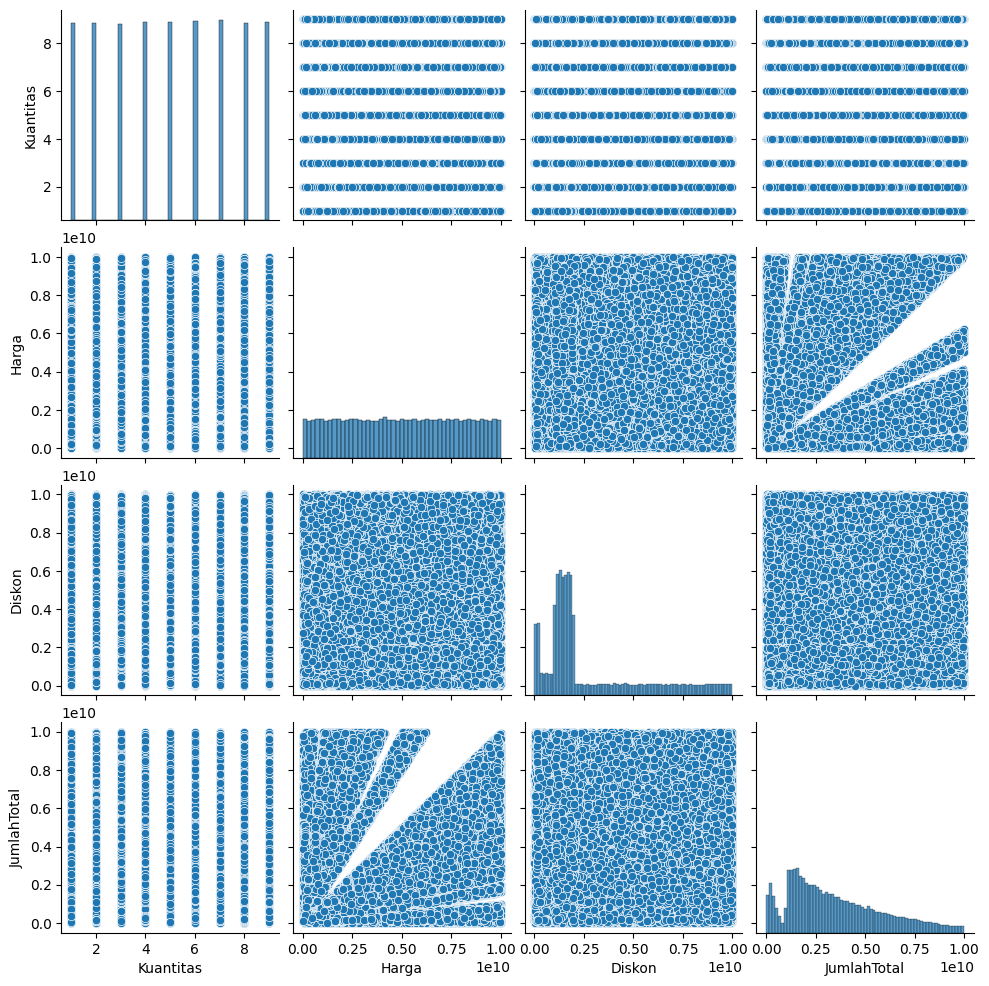

In [ ]:
sns.pairplot(df)

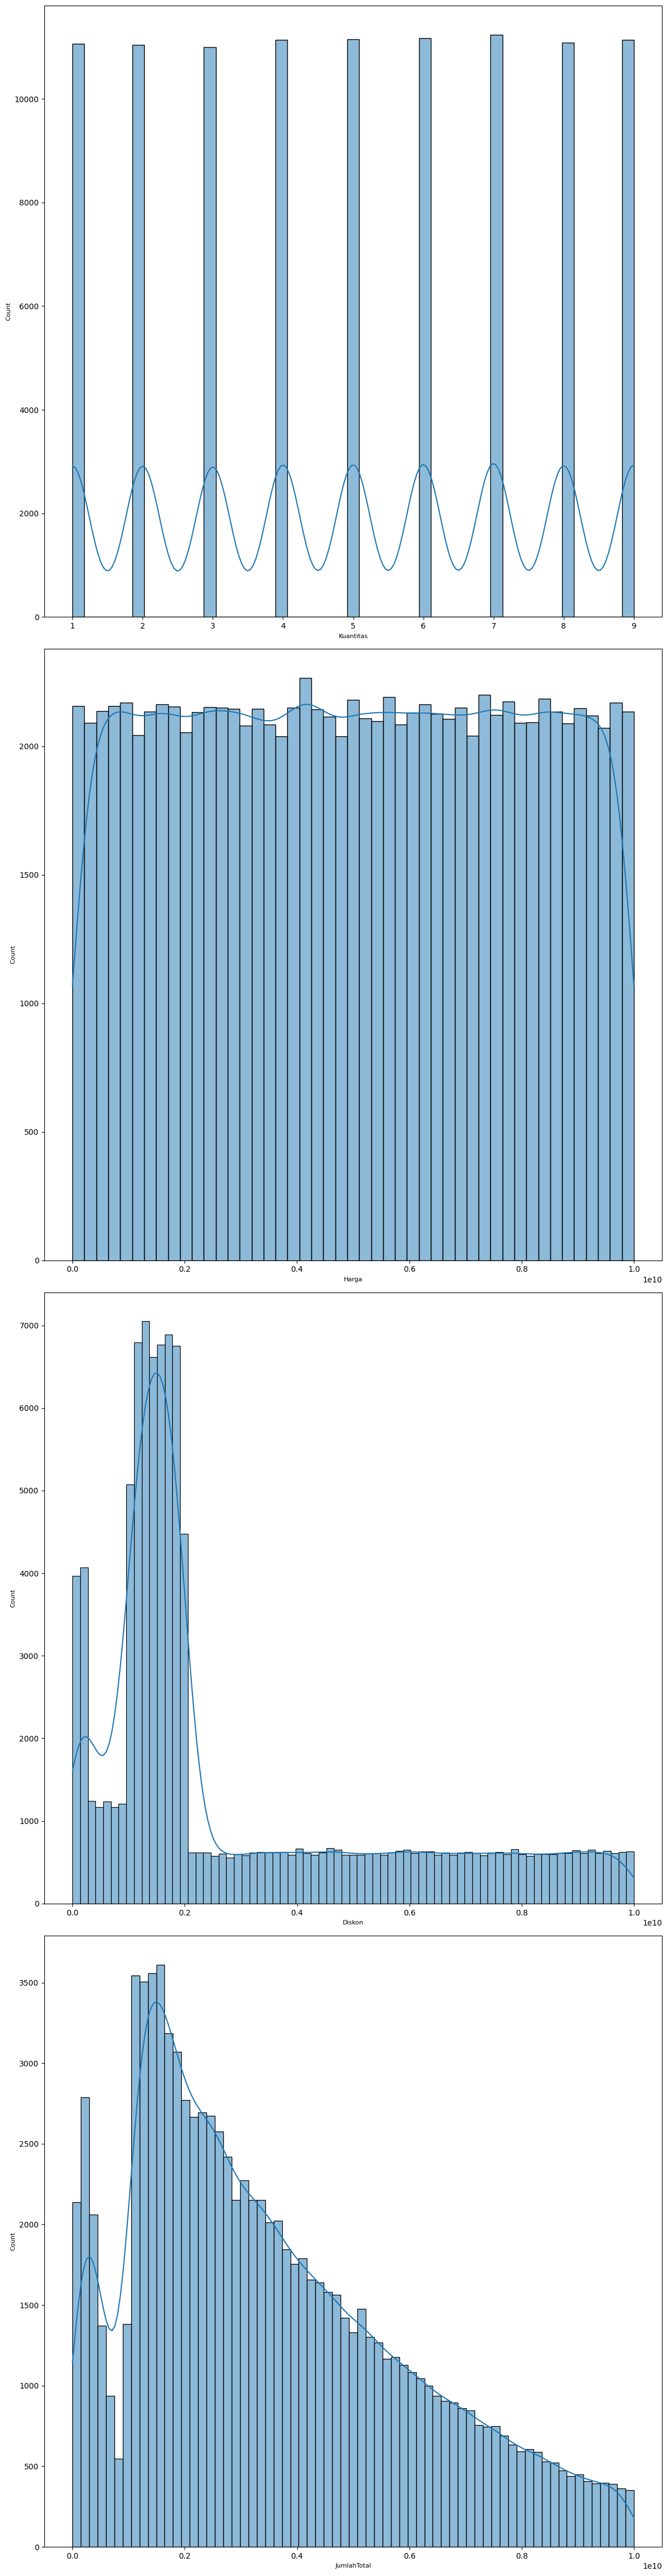

In [ ]:
#visualisasi dengan barplot
numerical_columns = ['Kuantitas', 'Harga', 'Diskon', 'JumlahTotal']

for column in numerical_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.dropna(subset=numerical_columns, inplace=True)


fig, ax = plt.subplots(len(numerical_columns), figsize=(12, 46))
for i, feature_name in enumerate(numerical_columns):
    sns.histplot(df[feature_name], kde=True, ax=ax[i])
    ax[i].set_ylabel('Count', fontsize=8)
    ax[i].set_xlabel("{}".format(feature_name), fontsize=8)
    # ax[i].set_title("Freq dist " + feature_name, fontsize=8)

plt.tight_layout()
plt.show()

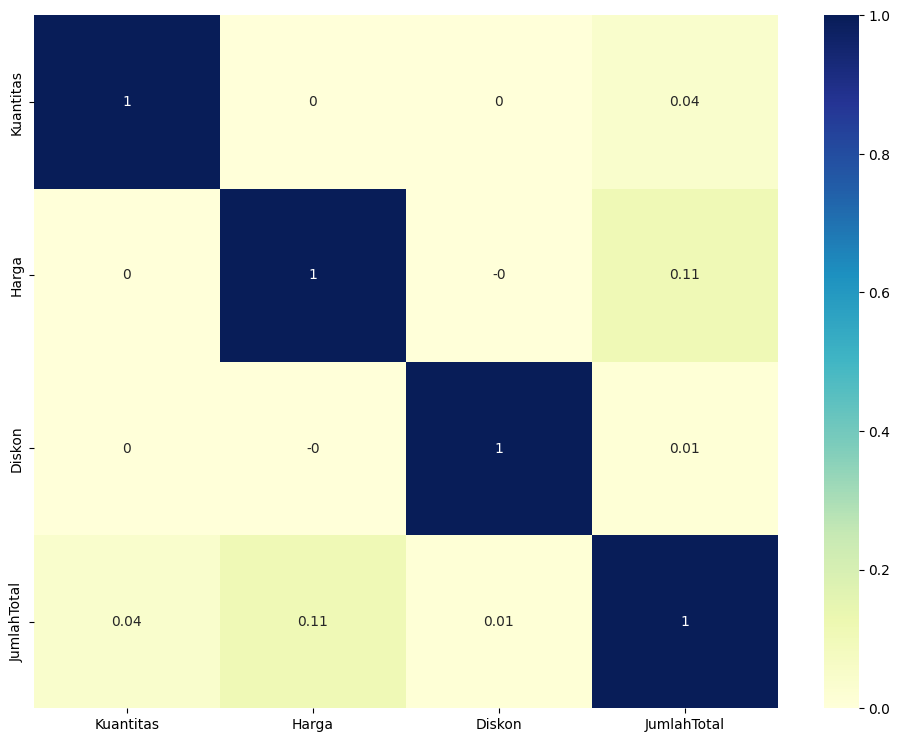

In [ ]:
# visualisasi dengan heatmap
numerical_df = df[numerical_columns]

plt.figure(figsize=(12, 9))
correlation_matrix = numerical_df.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     - 17.8 MB 23.4 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=359549 sha256=21c9c413c6a1610295f164180e2672dda68814433922d5092c8d2ee6f4cc3fed
  Stored in directory: /tmp/pip-ephem-wheel-cache-iqzwide6/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=6fa957646cb7316dbf7b6319d55fc8780dabfd1cdacb195d508567b225b12979
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built ydata-profiling htmlmin


In [ ]:
#overviews semua data menggunakan pandas profile report
from ydata_profiling import ProfileReport
df = pd.read_csv('https://github.com/Adkurrr/EDA-and-Prediction-Model-using-Retail-Transaction-Dataset/blob/main/Dataset%20Tugas.csv?raw=true', sep=None, na_values=-1)
report = ProfileReport(df, title='Exercise Report')
report

<ipython-input-14-f0264273a259>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('https://github.com/Adkurrr/EDA-and-Prediction-Model-using-Retail-Transaction-Dataset/blob/main/Dataset%20Tugas.csv?raw=true', sep=None, na_values=-1)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

###One Hot Encoding

In [ ]:
#one hot encoding kolom pembayaran
df['Pembayaran'].unique()

array(['Cash', 'PayPal', 'Debit Card', 'Credit Card'], dtype=object)

In [ ]:
one_hot_encoded = pd.get_dummies(df['Pembayaran'])
new_df = pd.concat([df, one_hot_encoded], axis=1)

In [ ]:
new_df.head(5)

IDKonsumen IDProduk  Kuantitas       Harga      TglTransaksi Pembayaran  \
0      109318        C          7  8007984415  12/26/2023 12:32       Cash   
1      993229        C          4  7519522942     8/5/2023 0:00       Cash   
2      579675        A          8  3152881648   3/11/2024 18:51       Cash   
3      799826        D          5  9888021828  10/27/2023 22:00     PayPal   
4      121413        A          7  9318851246  12/22/2023 11:38       Cash   

                                          LokasiToko KategoriProduk  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354          Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483     Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...          Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...          Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142    Electronics   

       Diskon  JumlahTotal   Cash  Credit Card  Debit Card  PayPal  
0   186770995   4558627638   True        False       False   False  
1  1412136502   2583065464   True        False       False   False  
2  1594370066   2120156509   True        False       False   False  
3   668633678   4613437694  False        False       False    True  
4  4030095691   6260304837   True        False       False   False

In [ ]:
new_df.drop(['Pembayaran'],axis=1,inplace=True)

In [ ]:
new_df[['Cash', 'PayPal', 'Debit Card', 'Credit Card']] = new_df[['Cash', 'PayPal', 'Debit Card', 'Credit Card']].astype(int)
new_df.head(5)

IDKonsumen IDProduk  Kuantitas       Harga      TglTransaksi  \
0      109318        C          7  8007984415  12/26/2023 12:32   
1      993229        C          4  7519522942     8/5/2023 0:00   
2      579675        A          8  3152881648   3/11/2024 18:51   
3      799826        D          5  9888021828  10/27/2023 22:00   
4      121413        A          7  9318851246  12/22/2023 11:38   

                                          LokasiToko KategoriProduk  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354          Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483     Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...          Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...          Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142    Electronics   

       Diskon  JumlahTotal  Cash  Credit Card  Debit Card  PayPal  
0   186770995   4558627638     1            0           0       0  
1  1412136502   2583065464     1            0           0       0  
2  1594370066   2120156509     1            0           0       0  
3   668633678   4613437694     0            0           0       1  
4  4030095691   6260304837     1            0           0       0

In [ ]:
#one hot encoding kolom kategori produk
df['KategoriProduk'].unique()

array(['Books', 'Home Decor', 'Electronics', 'Clothing'], dtype=object)

In [ ]:
one_hot_encoded = pd.get_dummies(df['KategoriProduk'])
new_dataframe = pd.concat([new_df, one_hot_encoded], axis=1)

In [ ]:
new_dataframe.head(5)

IDKonsumen IDProduk  Kuantitas       Harga      TglTransaksi  \
0      109318        C          7  8007984415  12/26/2023 12:32   
1      993229        C          4  7519522942     8/5/2023 0:00   
2      579675        A          8  3152881648   3/11/2024 18:51   
3      799826        D          5  9888021828  10/27/2023 22:00   
4      121413        A          7  9318851246  12/22/2023 11:38   

                                          LokasiToko KategoriProduk  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354          Books   
1  11635 William Well Suite 809\nEast Kara, MT 19483     Home Decor   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...          Books   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...          Books   
4   0070 Michelle Island Suite 143\nHoland, VA 80142    Electronics   

       Diskon  JumlahTotal  Cash  Credit Card  Debit Card  PayPal  Books  \
0   186770995   4558627638     1            0           0       0   True   
1  1412136502   2583065464     1            0           0       0  False   
2  1594370066   2120156509     1            0           0       0   True   
3   668633678   4613437694     0            0           0       1   True   
4  4030095691   6260304837     1            0           0       0  False   

   Clothing  Electronics  Home Decor  
0     False        False       False  
1     False        False        True  
2     False        False       False  
3     False        False       False  
4     False         True       False

In [ ]:
new_dataframe[['Books', 'Clothing', 'Electronics', 'Home Decor']] = new_dataframe[['Books', 'Clothing', 'Electronics', 'Home Decor']].astype(int)

In [ ]:
new_dataframe.drop(['KategoriProduk'],axis=1,inplace=True)
new_dataframe.head(5)

IDKonsumen IDProduk  Kuantitas       Harga      TglTransaksi  \
0      109318        C          7  8007984415  12/26/2023 12:32   
1      993229        C          4  7519522942     8/5/2023 0:00   
2      579675        A          8  3152881648   3/11/2024 18:51   
3      799826        D          5  9888021828  10/27/2023 22:00   
4      121413        A          7  9318851246  12/22/2023 11:38   

                                          LokasiToko      Diskon  JumlahTotal  \
0            176 Andrew Cliffs\nBaileyfort, HI 93354   186770995   4558627638   
1  11635 William Well Suite 809\nEast Kara, MT 19483  1412136502   2583065464   
2  910 Mendez Ville Suite 909\nPort Lauraland, MO...  1594370066   2120156509   
3  87522 Sharon Corners Suite 500\nLake Tammy, MO...   668633678   4613437694   
4   0070 Michelle Island Suite 143\nHoland, VA 80142  4030095691   6260304837   

   Cash  Credit Card  Debit Card  PayPal  Books  Clothing  Electronics  \
0     1            0           0       0      1         0            0   
1     1            0           0       0      0         0            0   
2     1            0           0       0      1         0            0   
3     0            0           0       1      1         0            0   
4     1            0           0       0      0         0            1   

   Home Decor  
0           0  
1           1  
2           0  
3           0  
4           0

#Model Prediksi

In [ ]:
new_dataframe.drop(['IDKonsumen', 'IDProduk', 'TglTransaksi', 'LokasiToko'], axis=1, inplace=True)

In [ ]:
new_dataframe.head(5)

Kuantitas       Harga      Diskon  JumlahTotal  Cash  Credit Card  \
0          7  8007984415   186770995   4558627638     1            0   
1          4  7519522942  1412136502   2583065464     1            0   
2          8  3152881648  1594370066   2120156509     1            0   
3          5  9888021828   668633678   4613437694     0            0   
4          7  9318851246  4030095691   6260304837     1            0   

   Debit Card  PayPal  Books  Clothing  Electronics  Home Decor  
0           0       0      1         0            0           0  
1           0       0      0         0            0           1  
2           0       0      1         0            0           0  
3           0       1      1         0            0           0  
4           0       0      0         0            1           0

###Data split

In [ ]:
train = new_dataframe.drop(['Harga'], axis=1)
test = new_dataframe['Harga']

x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

###Linear Regression

In [ ]:
model_linearRegression = LinearRegression()
model_linearRegression.fit(x_train, y_train)

score_LR = model_linearRegression.score(x_train, y_train)
print("Model Linear Regression Score: ", score_LR)

val_score_LR = cross_val_score(model_linearRegression, x_train, y_train, cv=5)
print("Mean Cross Validation Score Model Linear Regression : ", val_score_LR.mean())

Model Linear Regression Score:  0.012724906837120575
Mean Cross Validation Score Model Linear Regression :  0.012438797736197538


MSE :  8.239771184852002e+18
RMSE :  2870500162.8378286
R2 Score :  0.012724906837120575


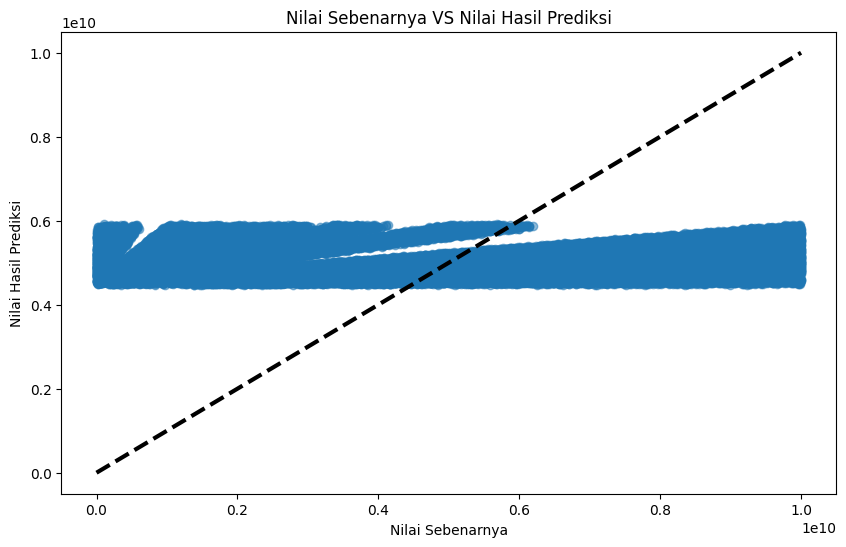

In [ ]:
y_pred = model_linearRegression.predict(x_train)

mse_lr = mean_squared_error(y_train, y_pred)
print("MSE : ", mse_lr)

rmse_lr = np.sqrt(mse_lr)
print("RMSE : ", rmse_lr)

r2Score_lr = r2_score(y_train, y_pred)
print("R2 Score : ", r2Score_lr)


plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Hasil Prediksi')
plt.title('Nilai Sebenarnya VS Nilai Hasil Prediksi')
plt.show()

###Decision Tree

In [ ]:
model_dtr = DecisionTreeRegressor()
model_dtr.fit(x_train, y_train)

score_dtr = model_dtr.score(x_train, y_train)
print("Model Decision Tree Regressor Score: ", score_dtr)

val_score_dtr = cross_val_score(model_dtr, x_train, y_train, cv=5)
print("Mean Cross Validation Score Model Decision Tree Regressor : ", val_score_dtr.mean())

Model Decision Tree Regressor Score:  1.0
Mean Cross Validation Score Model Decision Tree Regressor :  0.1834647165726883


In [ ]:
y_pred = model_dtr.predict(x_train)

mse_dtr = mean_squared_error(y_train, y_pred)
print("MSE : ", mse_dtr)

rmse_dtr = np.sqrt(mse_dtr)
print("RMSE : ", rmse_dtr)

r2Score_dtr = r2_score(y_train, y_pred)
print("R2 Score : ", r2Score_dtr)


plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Hasil Prediksi')
plt.title('Nilai Sebenarnya VS Nilai Hasil Prediksi')
plt.show()

MSE :  0.0
RMSE :  0.0
R2 Score :  1.0


###Random Forest

In [ ]:
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

score_rf = model_rf.score(x_train, y_train)
print("Model RandomForestRegressor Score: ", score_rf)

val_score_rf = cross_val_score(model_rf, x_train, y_train, cv=5)
print("Mean Cross Validation Score Model RandomForestRegressor : ", val_score_rf.mean())

Model RandomForestRegressor Score:  0.939103278570933
Mean Cross Validation Score Model RandomForestRegressor :  0.5609378457697018


In [ ]:
y_pred = model_rf.predict(x_train)

mse_rf = mean_squared_error(y_train, y_pred)
print("MSE : ", mse_rf)

rmse_rf = np.sqrt(mse_rf)
print("RMSE : ", rmse_rf)

r2Score_rf = r2_score(y_train, y_pred)
print("R2 Score : ", r2Score_rf)


plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Hasil Prediksi')
plt.title('Nilai Sebenarnya VS Nilai Hasil Prediksi')
plt.show()

MSE :  5.082423875149897e+17
RMSE :  712911205.9120615
R2 Score :  0.939103278570933


###Perbandingan ke-3 model

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [r2Score_lr, r2Score_dtr, r2Score_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.title('Perbandingan 3 Model Regresi')
plt.xlabel('Model')
plt.ylabel('Nilai R-squared')
plt.ylim(0, 1)
plt.show()